In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [32]:
import glob

csv_files = glob.glob('csvs_per_year/madrid_*.csv')

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

combined_df = pd.concat(dfs)

In [57]:
# find station with the least number of NaN values
combined_df.groupby('station').count().sort_values('CO', ascending=False).head(10)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,PM25,NO,CH4
station,,,,,,,,,,,,,,,,,,
28079004,151776,0,151213,0,0,0,151273,92320,0,78520,78274,0,151311,0,0,0,64030,0
28079016,151776,0,151182,0,0,0,151290,92321,0,151131,75920,0,78497,0,0,0,64045,0
28079036,151056,0,150561,0,0,0,150508,92074,0,77309,150164,0,150563,0,0,0,63502,0
28079024,151416,137910,149779,133762,72331,148472,149782,91247,72331,149135,149058,72332,149833,148522,137898,121807,63585,4911
28079018,149760,70546,149053,70517,0,31463,148971,90657,0,149067,144079,0,149020,31441,70327,0,63334,0
28079039,148824,0,148095,0,0,0,148100,89205,0,146894,74725,0,75435,0,0,0,63924,0
28079008,139608,132088,138760,132067,0,117187,138423,79975,0,137820,135851,0,138622,117265,131656,73664,63516,5004
28079035,115656,50530,114804,50547,50407,47626,114841,56470,50530,113905,51328,50493,114523,47636,50472,0,63438,0
28079099,87648,87128,87621,87036,81779,86828,87571,87603,81841,87624,87576,81806,87619,87015,87174,60291,0,0


In [130]:
df = combined_df.loc[combined_df.station == 28079024] # Casa de Campo
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
21,2001-08-01 01:00:00,0.80,0.43,0.71,1.20,0.10,27.190001,29.700001,0.76,56.990002,114.300003,0.49,10.84,1.42,3.43,28079024,NaN,NaN,NaN
45,2001-08-01 02:00:00,0.74,0.51,0.78,1.23,0.12,36.980000,38.310001,0.78,46.939999,78.949997,0.51,11.01,1.38,3.72,28079024,NaN,NaN,NaN
69,2001-08-01 03:00:00,1.07,0.43,1.09,2.04,0.11,32.250000,33.310001,1.14,52.419998,61.790001,0.81,10.76,1.37,6.39,28079024,NaN,NaN,NaN
93,2001-08-01 04:00:00,0.81,0.42,0.92,1.65,0.11,28.740000,29.820000,0.91,55.980000,58.320000,0.67,10.49,1.37,5.14,28079024,NaN,NaN,NaN
117,2001-08-01 05:00:00,0.72,0.42,0.94,1.67,0.09,26.270000,28.290001,0.91,61.160000,51.660000,0.67,10.29,1.45,5.88,28079024,NaN,NaN,NaN


In [131]:
df.isna().sum().sort_values(ascending=True) # use SO_2, NO_2, CO, O_3, PM10

date            0
station         0
SO_2         1583
NO_2         1634
CO           1637
O_3          2281
PM10         2358
TCH          2894
NMHC         2944
BEN         13506
TOL         13518
EBE         17654
PM25        29609
NOx         60169
PXY         79084
MXY         79085
OXY         79085
NO          87831
CH4        146505
dtype: int64

In [132]:
df = df[['date','SO_2','NO_2','CO','O_3','PM10']]
df.head()

,date,SO_2,NO_2,CO,O_3,PM10
21,2001-08-01 01:00:00,10.84,27.190001,0.43,56.990002,114.300003
45,2001-08-01 02:00:00,11.01,36.980000,0.51,46.939999,78.949997
69,2001-08-01 03:00:00,10.76,32.250000,0.43,52.419998,61.790001
93,2001-08-01 04:00:00,10.49,28.740000,0.42,55.980000,58.320000
117,2001-08-01 05:00:00,10.29,26.270000,0.42,61.160000,51.660000


In [133]:
df.describe()

,SO_2,NO_2,CO,O_3,PM10
count,149833.000000,149782.000000,149779.000000,149135.000000,149058.000000
mean,5.876054,29.026865,0.354314,52.132650,22.510561
std,3.941970,25.910580,0.245013,34.831988,18.997092
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,0.200000,22.090000,10.000000
50%,5.280000,20.730000,0.290000,51.799999,17.200001
75%,8.000000,42.070000,0.470000,75.820000,29.020000
max,71.790001,262.500000,4.430000,220.000000,361.000000


In [134]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date    datetime64[ns]
SO_2           float64
NO_2           float64
CO             float64
O_3            float64
PM10           float64
dtype: object

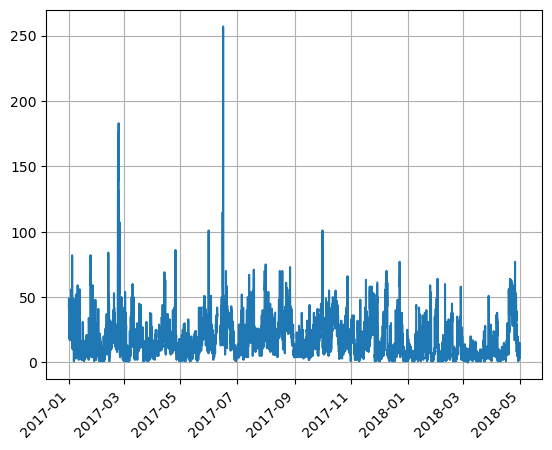

In [149]:
df = df.sort_values('date')

df_sample = df.query('date > "2017-01-01"')
plt.plot(df_sample.date, df_sample.PM10)
plt.xticks(rotation=45, ha='right')
plt.grid()

In [166]:
df_so2 = df[['date','SO_2']]
df_so2.columns = ['ds','y']
df_so2

,ds,y
108382,2001-01-01 01:00:00,9.69
108407,2001-01-01 02:00:00,9.76
108432,2001-01-01 03:00:00,11.11
108457,2001-01-01 04:00:00,12.34
108482,2001-01-01 05:00:00,13.05
...,...,...
34998,2018-04-30 20:00:00,3.00
35022,2018-04-30 21:00:00,3.00
35046,2018-04-30 22:00:00,3.00
35070,2018-04-30 23:00:00,3.00


In [167]:
%%time
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(df_so2)

20:40:09 - cmdstanpy - INFO - Chain [1] start processing
20:45:25 - cmdstanpy - INFO - Chain [1] done processing


Wall time: 5min 34s


In [168]:
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151776,2019-04-27,3.958382,-7.685683,11.586284,-5.245627,12.991417,-0.991515,-0.991515,-0.991515,-0.084783,...,0.080180,0.080180,0.080180,-0.986911,-0.986911,-0.986911,0.0,0.0,0.0,2.966867
151777,2019-04-28,3.959525,-6.785957,12.727001,-5.286880,13.024110,-1.316721,-1.316721,-1.316721,-0.084783,...,-0.251530,-0.251530,-0.251530,-0.980407,-0.980407,-0.980407,0.0,0.0,0.0,2.642803
151778,2019-04-29,3.960667,-6.239790,12.473343,-5.328133,13.056802,-1.227942,-1.227942,-1.227942,-0.084783,...,-0.171010,-0.171010,-0.171010,-0.972149,-0.972149,-0.972149,0.0,0.0,0.0,2.732725
151779,2019-04-30,3.961809,-6.397296,12.398569,-5.369386,13.089494,-0.975805,-0.975805,-0.975805,-0.084783,...,0.071181,0.071181,0.071181,-0.962202,-0.962202,-0.962202,0.0,0.0,0.0,2.986004
151780,2019-05-01,3.962952,-5.634681,13.055262,-5.410639,13.122186,-0.931330,-0.931330,-0.931330,-0.084783,...,0.104115,0.104115,0.104115,-0.950662,-0.950662,-0.950662,0.0,0.0,0.0,3.031622


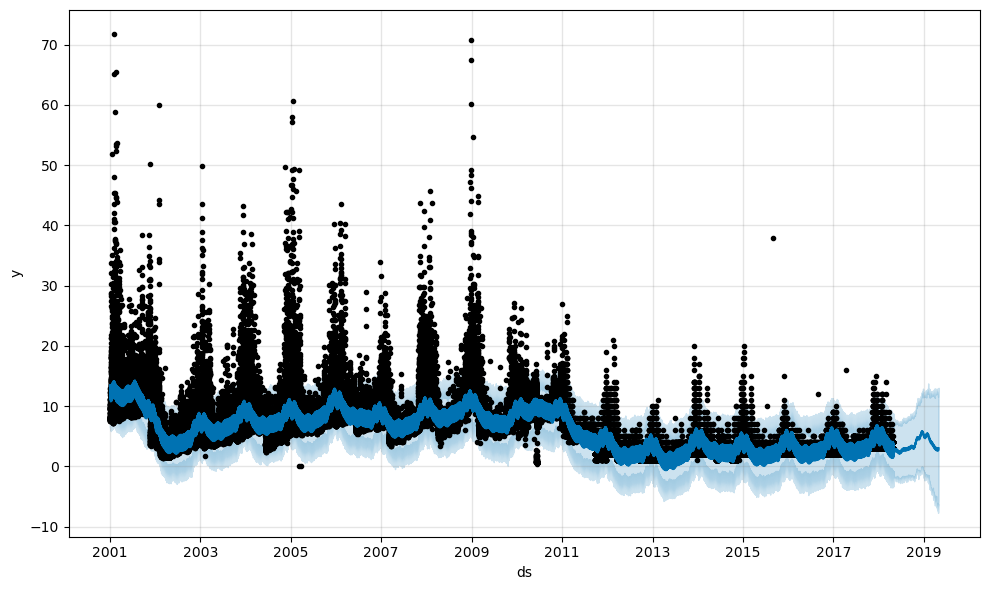

In [169]:
plot1 = model.plot(forecast)

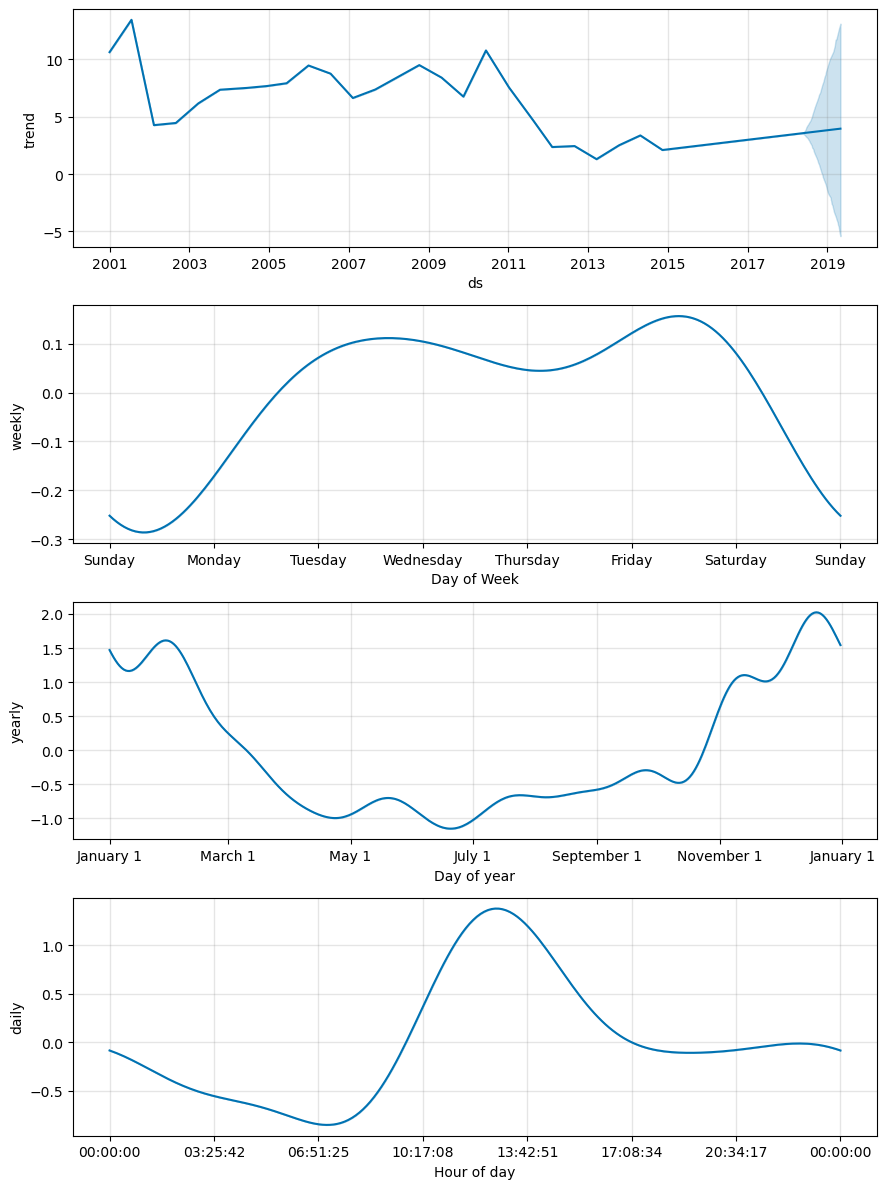

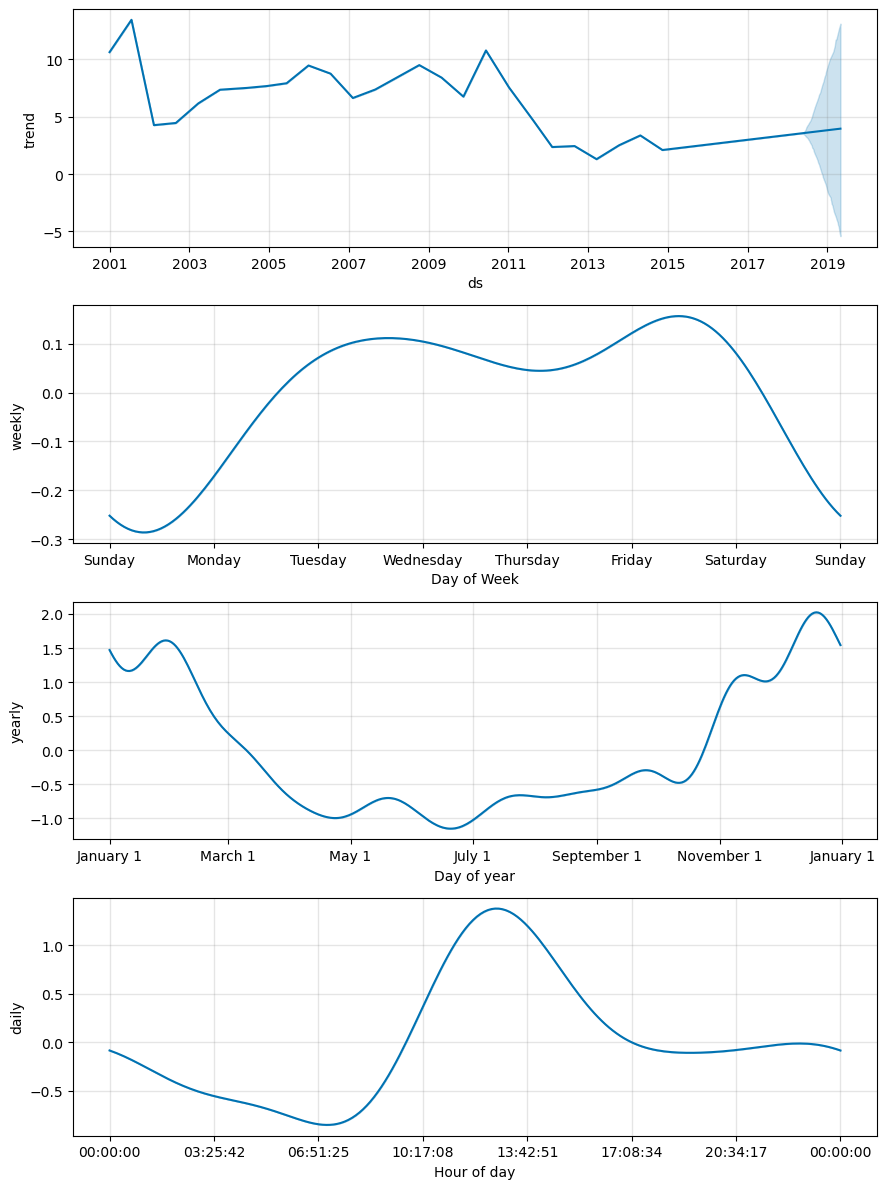

In [170]:
model.plot_components(forecast)